## Packages importing 

In [297]:
!pip install matplotlib seaborn pandas numpy scikit-learn datasist imbalanced-learn category-encoders xgboost joblib

In [298]:
# Packages for EDA 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
import numpy as np 

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from datasist.structdata import detect_outliers
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import category_encoders as ce
import re 

# Modeling and evaluation 
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (
    BaggingClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
    StackingClassifier,
    HistGradientBoostingClassifier
)
from xgboost import XGBClassifier
from sklearn.metrics import classification_report 
import joblib

# Packages options 
sns.set(rc={'figure.figsize': [14, 7]}, font_scale=1.2) # Standard figure size for all 
np.seterr(divide='ignore', invalid='ignore', over='ignore') ;

import warnings 
warnings.filterwarnings("ignore")

## Reading Data 

In [299]:
df = pd.read_csv("train.csv",low_memory=False)

In [300]:
df.sample(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
33528,0xda76,CUS_0x14f5,January,Richard Leongd,40,497-15-6333,Doctor,36348.06,NaN,1779,...,_,4974.81,35.917870,NaN,NM,149.399918,194.82989838367072,Low_spent_Large_value_payments,252.27068341833728,Poor
99878,0x25f38,CUS_0x3855,July,NaN,27,963-55-7106,Scientist,118677.54,9963.795000,4,...,Good,995.47,36.246273,30 Years and 5 Months,No,237.106366,198.7625260677193,!@9#%8,810.5106080578134,Good
13109,0x62cf,CUS_0x2b2c,June,Perryy,52,676-48-0117,Entrepreneur,43312.78,3423.398333,4,...,Good,208.96,28.707389,19 Years and 1 Months,No,25.348420,440.2365317224337,Low_spent_Small_value_payments,166.75488166138192,Standard
9411,0x4d25,CUS_0x333c,April,Matthewj,20,835-38-7010,Manager,46640.82,3824.735000,3,...,_,816.11,38.283557,29 Years and 8 Months,No,75.535767,310.5987692629687,Low_spent_Large_value_payments,266.33896376725016,Good
52351,0x148bd,CUS_0xbedd,August,Flynnp,39,215-69-2225,Accountant,68824.42,4924.658801,4,...,Good,1455.38,25.836516,19 Years and 4 Months,No,835.717525,305.84577592922113,!@9#%8,496.28306465110893,Good
51781,0x14567,CUS_0x3be5,June,Copleyk,43,075-06-4820,Engineer,11900.03,NaN,3,...,Standard,399.01,31.095041,NaN,No,35.546222,109.91358234857678,Low_spent_Small_value_payments,271.0071126588615,Standard
47242,0x12ad0,CUS_0x446,March,Edwardso,44,767-35-3133,Architect,17327.28,1716.940000,6,...,Bad,2291.35,36.611802,NaN,Yes,55.438498,NaN,High_spent_Small_value_payments,263.1682013889278,Poor
61124,0x17c26,CUS_0x60ec,May,Shalal-Esar,42,211-05-3339,Musician,41975.0,3761.916667,2,...,Good,72.24,28.454613,25 Years and 1 Months,No,0.000000,187.9421880031073,!@9#%8,448.2494786635593,Good
40082,0x100dc,CUS_0x5cdb,March,Barta,36,358-85-5659,Lawyer,12338.465,738.205417,5,...,Good,352.92,27.951894,31 Years and 10 Months,No,10.218511,40.86913407758903,Low_spent_Large_value_payments,292.7328968314193,Poor
28363,0xbc31,CUS_0xb1dd,April,Thomask,56,061-81-4991,Doctor,12151.75,1187.645833,5,...,Standard,1011.03,37.147449,23 Years and 1 Months,No,7.249926,158.0496122341931,Low_spent_Small_value_payments,243.46504491725312,Standard


## Data Exploration

In [301]:
df.shape

(100000, 28)

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [303]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [304]:
df.duplicated().sum()

0

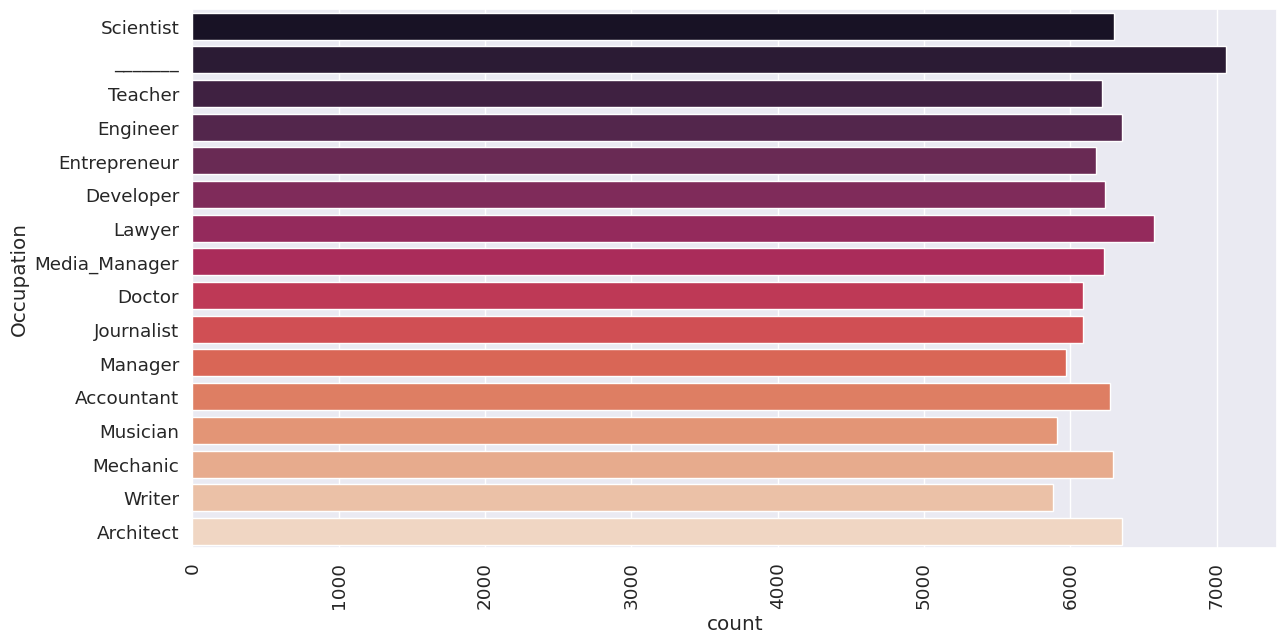

In [305]:
sns.countplot(df['Occupation'],palette="rocket");
plt.xticks(rotation=90);

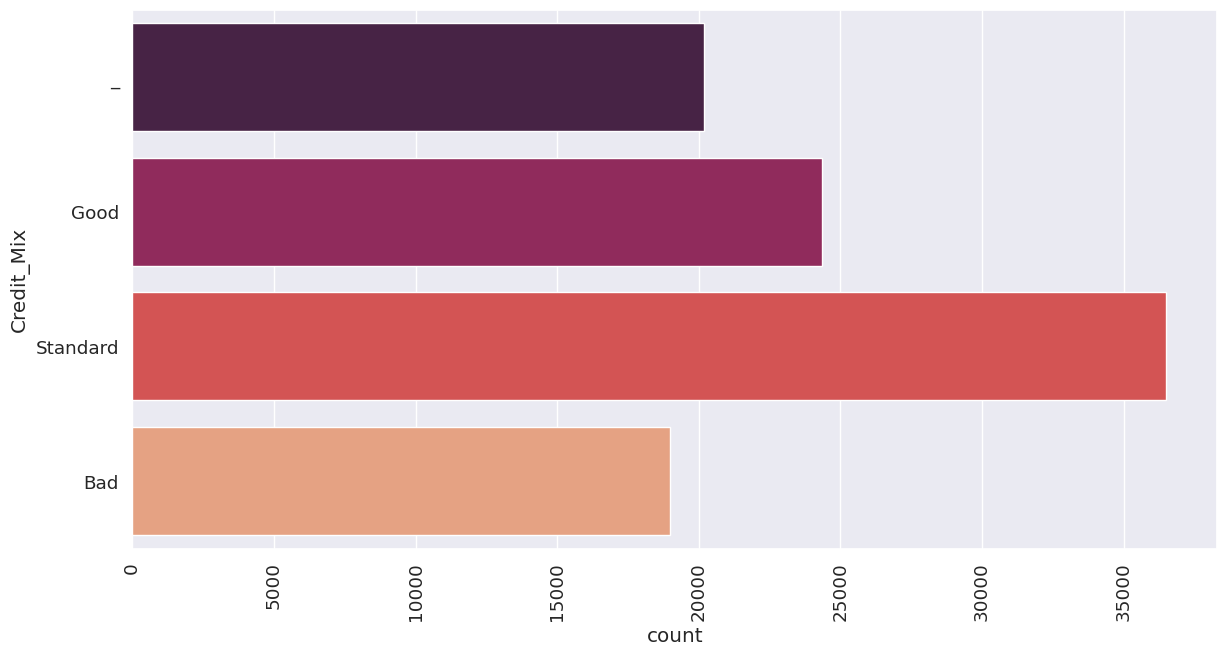

In [306]:
sns.countplot(df['Credit_Mix'],palette="rocket");
plt.xticks(rotation=90);

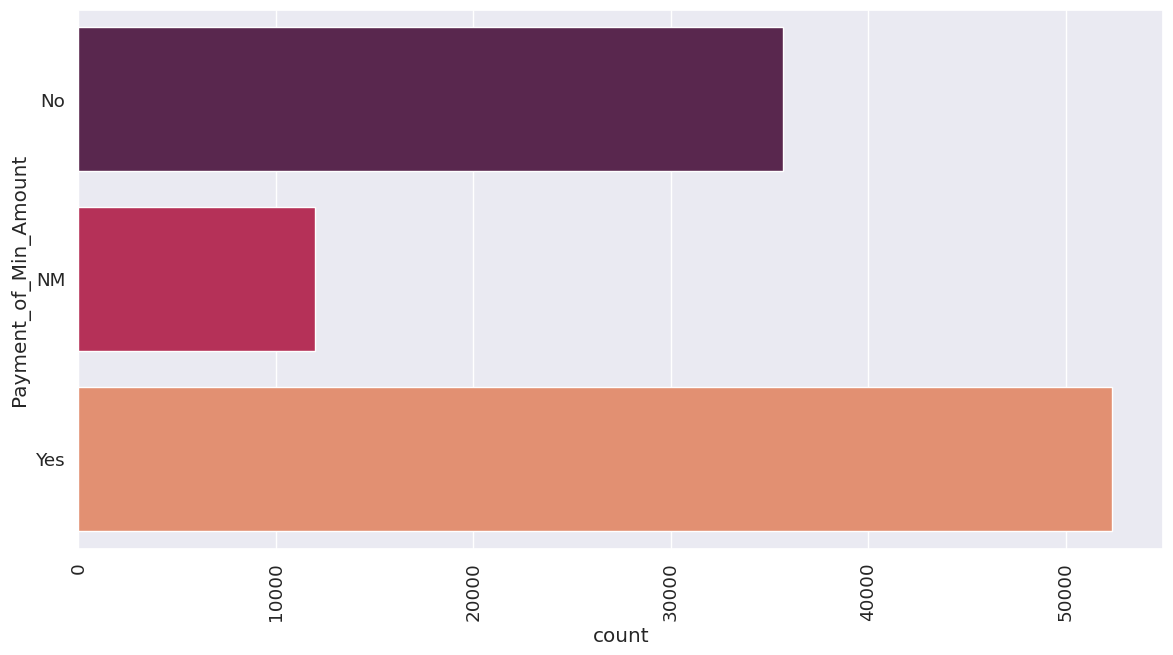

In [307]:
sns.countplot(df['Payment_of_Min_Amount'],palette="rocket");
plt.xticks(rotation=90);

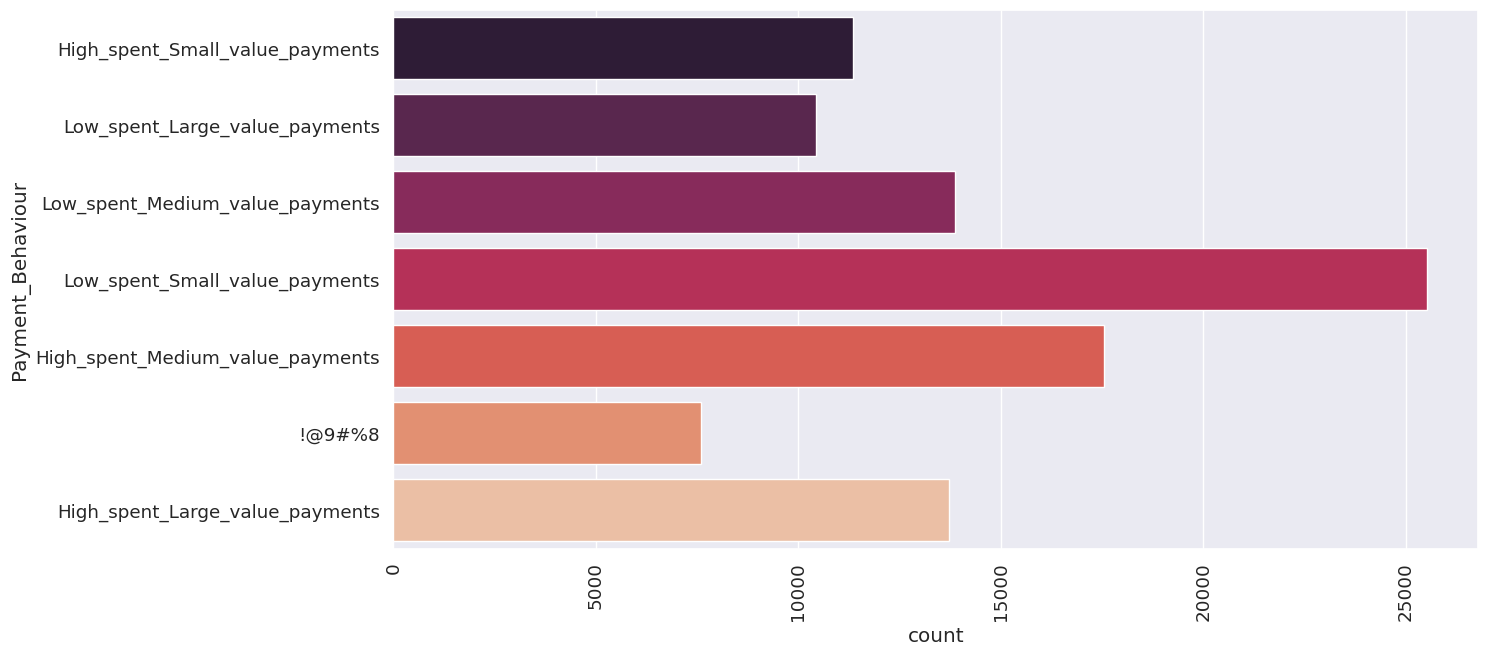

In [308]:
sns.countplot(df['Payment_Behaviour'],palette="rocket");
plt.xticks(rotation=90);

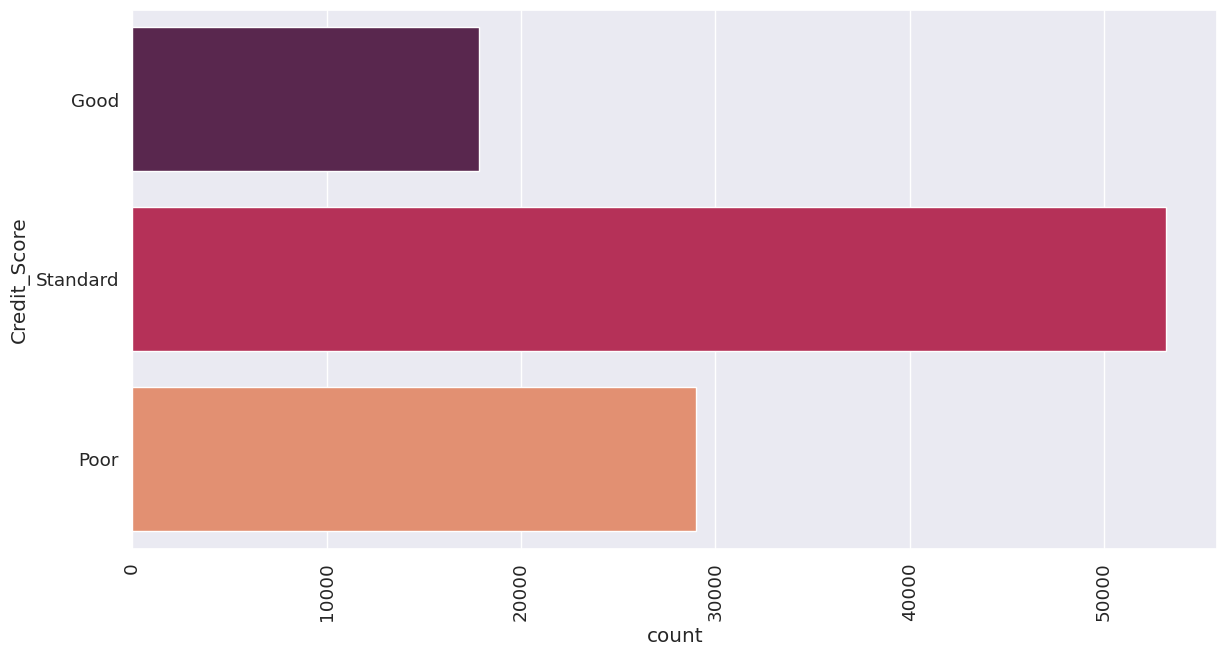

In [309]:
sns.countplot(df['Credit_Score'],palette="rocket");
plt.xticks(rotation=90);

In [310]:
df['Credit_Score'].value_counts(normalize=True)

Credit_Score
Standard    0.53174
Poor        0.28998
Good        0.17828
Name: proportion, dtype: float64

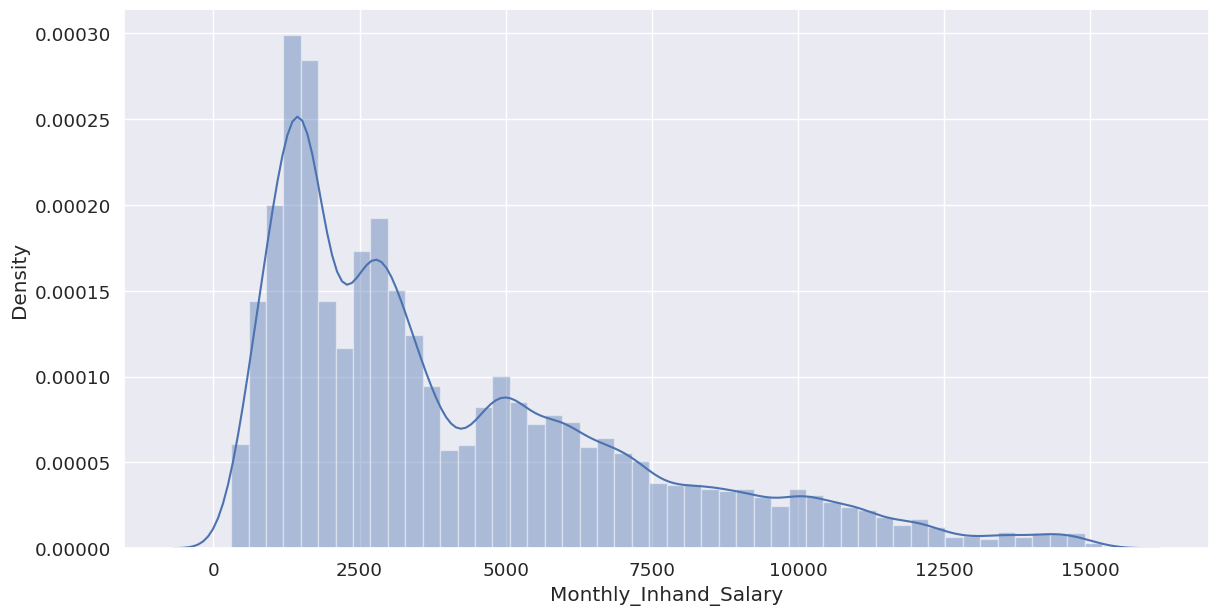

In [311]:
sns.distplot(df['Monthly_Inhand_Salary']);

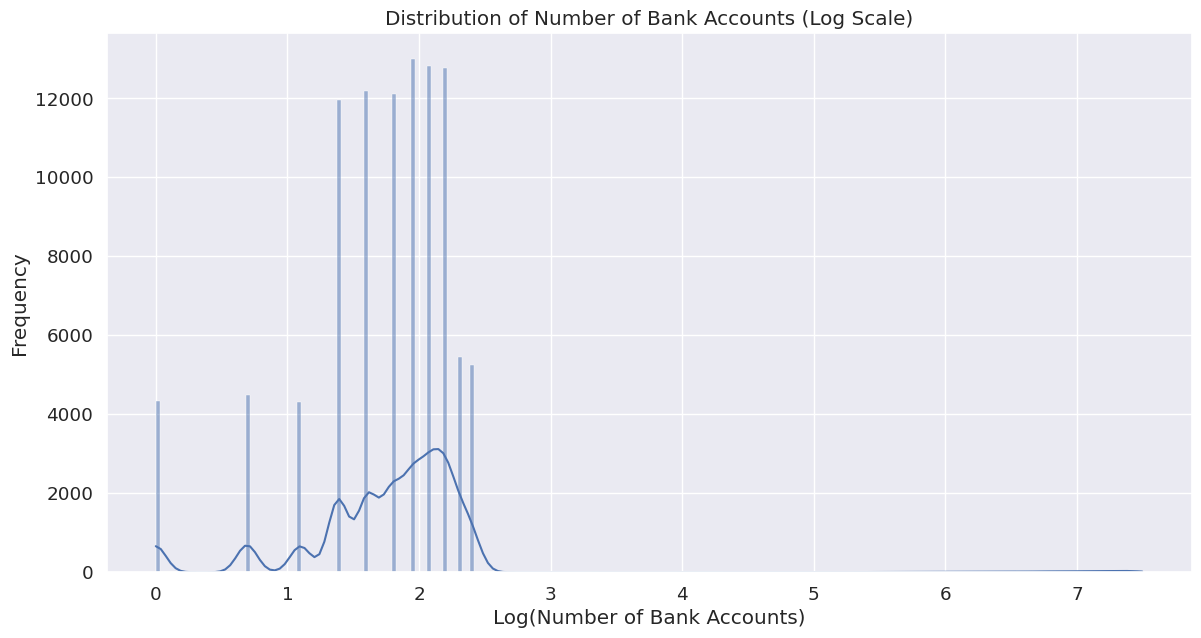

In [312]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

num_bank_accounts_log = np.log1p(df['Num_Bank_Accounts'])

plt.figure(figsize=(14, 7))
sns.histplot(num_bank_accounts_log, kde=True)
plt.title('Distribution of Number of Bank Accounts (Log Scale)')
plt.xlabel('Log(Number of Bank Accounts)')
plt.ylabel('Frequency')
plt.show()


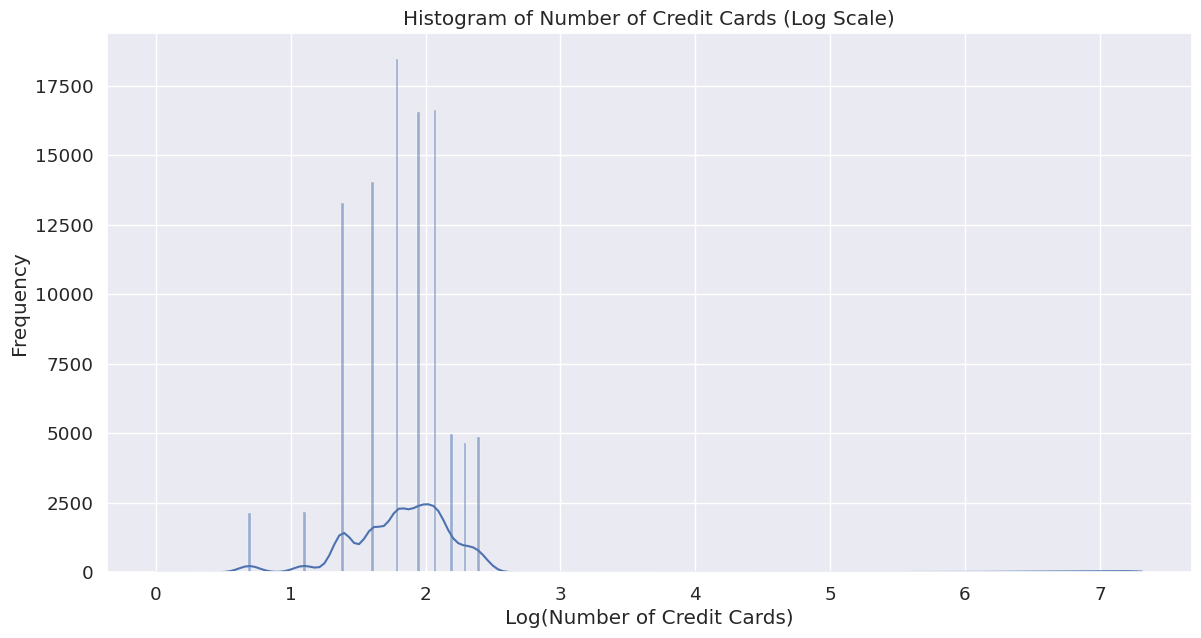

In [313]:
num_credit_card_log = np.log1p(df['Num_Credit_Card'])

plt.figure(figsize=(14, 7))
sns.histplot(num_credit_card_log, kde=True)
plt.title('Histogram of Number of Credit Cards (Log Scale)')
plt.xlabel('Log(Number of Credit Cards)')
plt.ylabel('Frequency')
plt.show()

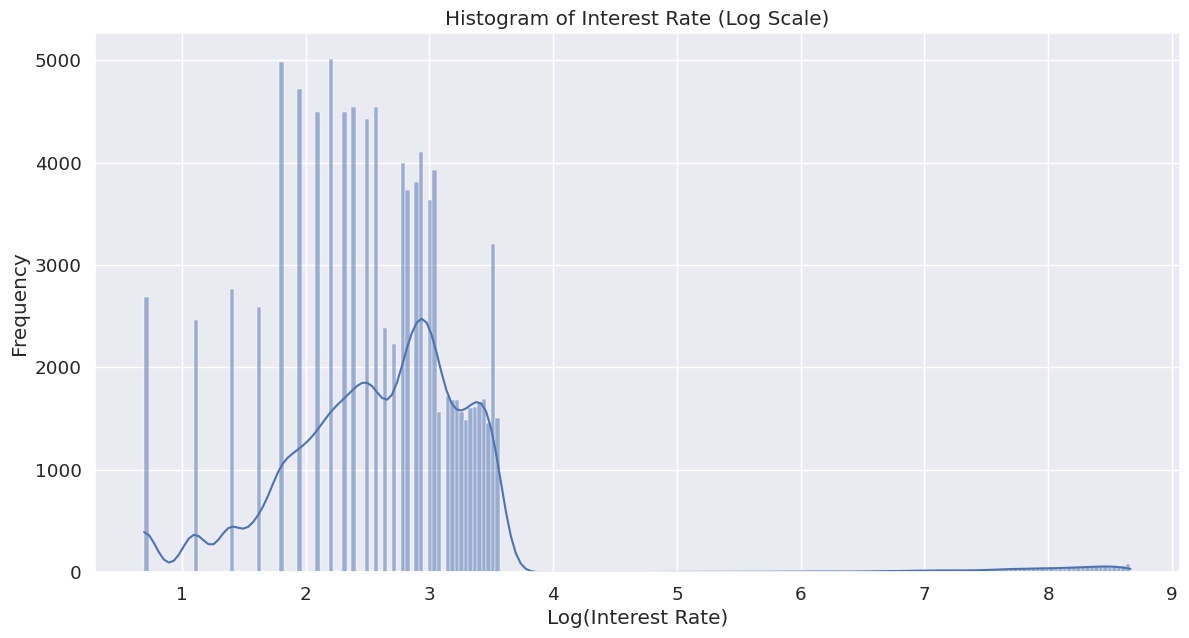

In [314]:
interest_rate_log = np.log1p(df['Interest_Rate'])

plt.figure(figsize=(14, 7))
sns.histplot(interest_rate_log, kde=True)
plt.title('Histogram of Interest Rate (Log Scale)')
plt.xlabel('Log(Interest Rate)')
plt.ylabel('Frequency')
plt.show()

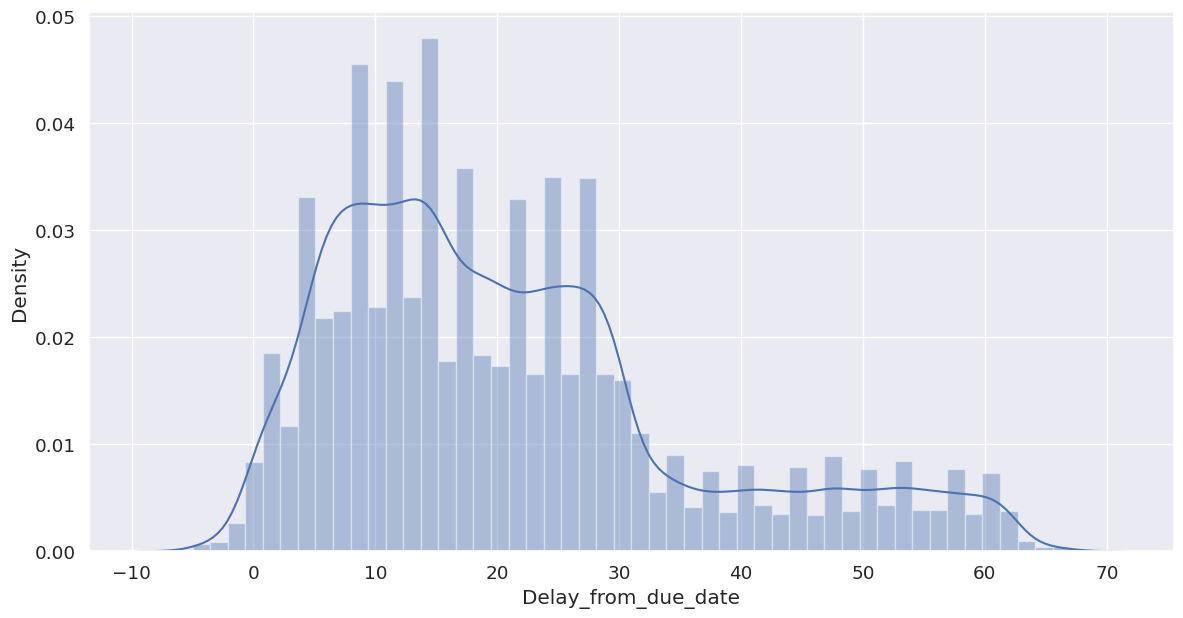

In [315]:
sns.distplot(df['Delay_from_due_date']);

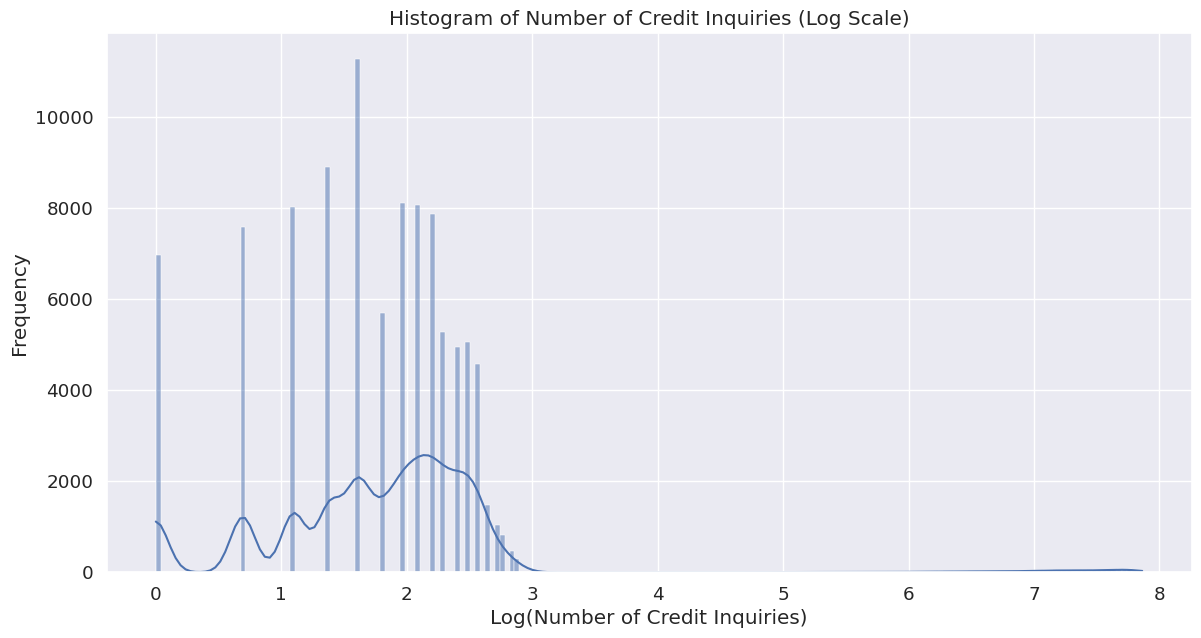

In [316]:
num_credit_inquiries_log = np.log1p(df['Num_Credit_Inquiries'])

plt.figure(figsize=(14, 7))
sns.histplot(num_credit_inquiries_log, kde=True)
plt.title('Histogram of Number of Credit Inquiries (Log Scale)')
plt.xlabel('Log(Number of Credit Inquiries)')
plt.ylabel('Frequency')
plt.show()

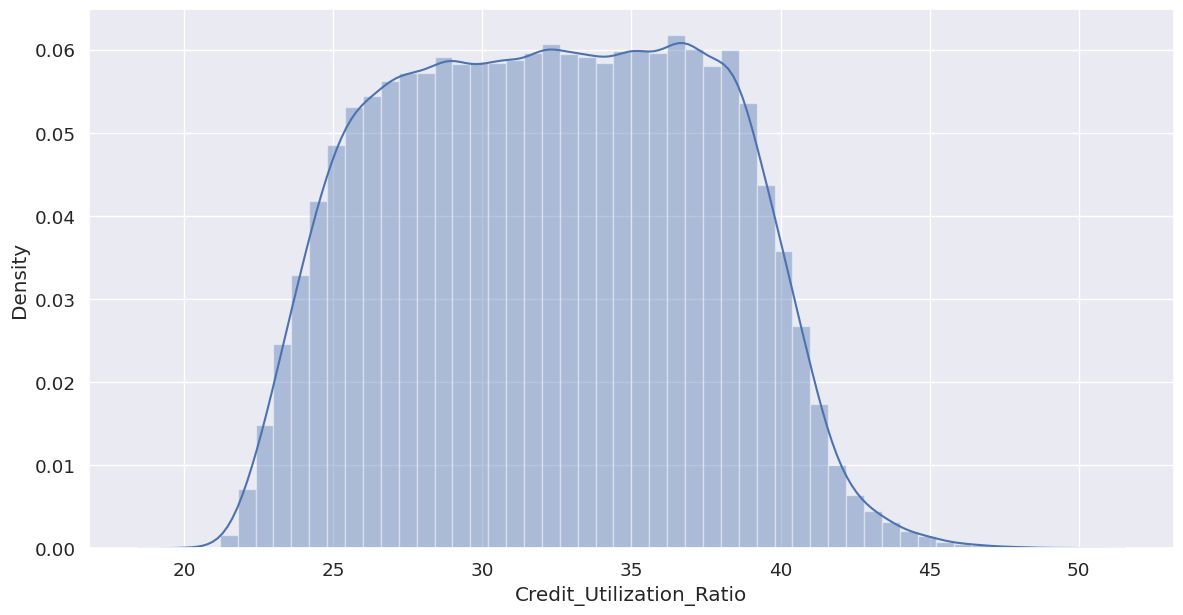

In [317]:
sns.distplot(df['Credit_Utilization_Ratio']);

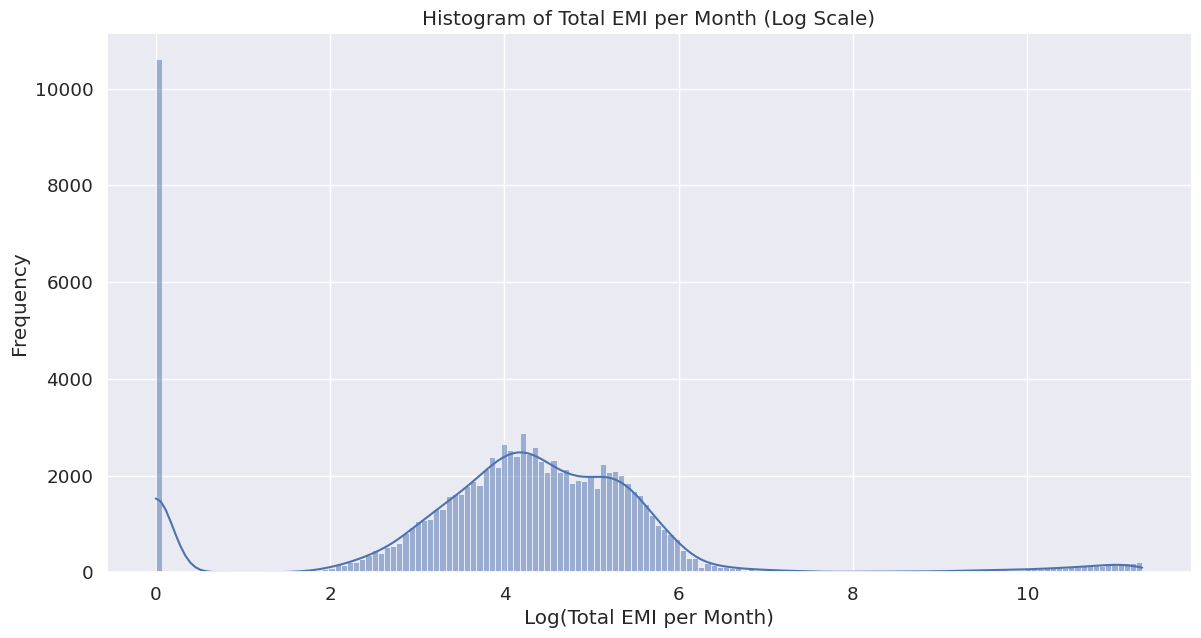

In [318]:
total_emi_per_month_log = np.log1p(df['Total_EMI_per_month'])

# Plotting the histogram with log scale
plt.figure(figsize=(14, 7))
sns.histplot(total_emi_per_month_log, kde=True)
plt.title('Histogram of Total EMI per Month (Log Scale)')
plt.xlabel('Log(Total EMI per Month)')
plt.ylabel('Frequency')
plt.show()

In [319]:
df['Type_of_Loan'].value_counts().head(10)

Type_of_Loan
Not Specified                      1408
Credit-Builder Loan                1280
Personal Loan                      1272
Debt Consolidation Loan            1264
Student Loan                       1240
Payday Loan                        1200
Mortgage Loan                      1176
Auto Loan                          1152
Home Equity Loan                   1136
Personal Loan, and Student Loan     320
Name: count, dtype: int64

### Issues with this dataset: 
1. The following headings are supposed to be numerical but appear as categorical datatypes: Age, Annual_Income, Num_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit, Amount_invested_monthly, Outstanding_Debt Credit_Mix, Monthly_Balance
2. Remove these headings: ID, Name and SSN (Not useful)
3. Remove missing data
4. Credit_Mix has value a value "-" which needs to be removed/fixed
5. Num_Credit_Card has __zeros__
6. Type_of_Loan nees to be rewritten
7. Negative values exist in the header: Num_Bank_Accounts
8. Outliers need to be removed
9. Missing data need to be filled/removed
10. Target column does not have even balance of outputs
11. Following headers need more fixing to balance out dataset: Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,'Credit_Mix'

## Data cleaning

In [320]:
del df['ID'] # Identification 
del df['Name'] # Name of client 
del df['SSN'] # SSN (social security number of a person)

#### Fixing Numerical Columns to be of float data-type and removing "-" columns

1. replace _  
2. convert into float 

In [321]:
to_be_fixed = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Amount_invested_monthly', 'Outstanding_Debt' , 'Monthly_Balance']

In [322]:
def fix_nums(num):
    try : 
        return float(num.replace("_",""))
    except :
        return np.nan

In [323]:
for col in to_be_fixed :
    df[col] = df[col].apply(fix_nums)

### Transform Type_of_Loan header

In [324]:
## transform the Type_of_Loan column, which contains categorical data, into multiple binary columns.
for i in df['Type_of_Loan'].value_counts().head(9).index[1:] : 
    df[i] = df['Type_of_Loan'].str.contains(i)

del df['Type_of_Loan']

#### Make Num_Bank_Accounts to be positive always

In [325]:
# number of bank accounts must be positive
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x :abs (x))

#### Non-Zero for Num_Credit_Card

In [326]:
# number of credit cards must be atleast 1
df['Num_Credit_Card'].replace(0,1,inplace=True)

#### Convert credit history ages under Credit_History_Age to all integers

In [327]:
def history_age(age):
    try : 
        years = int("".join(re.findall('[0-9]',''.join(age.split("and")[0]))))
        month = int("".join(re.findall('[0-9]',''.join(age.split("and")[1]))))
        return years*12 + month
    except :
        return np.nan

In [328]:
df['Credit_History_Age'] = df['Credit_History_Age'].apply(history_age)

#### Payment_of_Min_Amount

In [329]:
df['Payment_of_Min_Amount'].replace("NM","No",inplace=True)

In [330]:
df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    52326
No     47674
Name: count, dtype: int64

#### Payment_Behaviour

In [331]:
df['Payment_Behaviour']= df['Payment_Behaviour'].replace("!@9#%8",np.nan)

In [332]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: count, dtype: int64

### Occupation

In [333]:
df['Occupation'].value_counts()

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [334]:
occs = df['Occupation'].value_counts().index[1:]
occs

Index(['Lawyer', 'Architect', 'Engineer', 'Scientist', 'Mechanic',
       'Accountant', 'Developer', 'Media_Manager', 'Teacher', 'Entrepreneur',
       'Doctor', 'Journalist', 'Manager', 'Musician', 'Writer'],
      dtype='object', name='Occupation')

In [335]:
# for the specified customer, identify the most common occupation in their records
# replace missing values of "_______" with the most common occupation for that customer
id_ = "CUS_0xb891"
oc = df[df['Customer_ID'] == id_]['Occupation'].mode()[0]
df[df['Customer_ID'] == id_].replace("_______",oc)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
24,CUS_0xb891,January,54.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,433.604773,Standard,False,False,False,False,False,False,False,False
25,CUS_0xb891,February,54.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,409.951812,Standard,False,False,False,False,False,False,False,False
26,CUS_0xb891,March,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,411.427123,Standard,False,False,False,False,False,False,False,False
27,CUS_0xb891,April,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,262.499594,Standard,False,False,False,False,False,False,False,False
28,CUS_0xb891,May,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,359.374916,Standard,False,False,False,False,False,False,False,False
29,CUS_0xb891,June,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,419.880784,Standard,False,False,False,False,False,False,False,False
30,CUS_0xb891,July,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,443.549957,Standard,False,False,False,False,False,False,False,False
31,CUS_0xb891,August,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,-100.0,...,379.216381,Standard,False,False,False,False,False,False,False,False


In [336]:
for _id_ in df[df['Occupation'] == "_______"]['Customer_ID'] : 
    oc = df[df['Customer_ID'] == _id_]['Occupation'].mode()[0]
    df[df['Customer_ID'] == _id_] = df[df['Customer_ID'] == _id_].replace("_______",oc)

In [337]:
df['Occupation'].value_counts()

Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6715
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
_______             5
Name: count, dtype: int64

In [338]:
df['Occupation'] = df['Occupation'].replace("_______",df['Occupation'].mode()[0])

In [339]:
df['Occupation'].value_counts()

Occupation
Lawyer           7101
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6715
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64

In [340]:
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

In [341]:
m = {
    "Bad":0,
    "Standard":1,
    "Good":2,
    "_":np.nan
}

In [342]:
df['Credit_Mix'] = df['Credit_Mix'].map(m)

In [343]:
df['Credit_Mix'].value_counts()

Credit_Mix
1.0    36479
2.0    24337
0.0    18989
Name: count, dtype: int64

### Advanced Handling Missing Data 

In [344]:
# edit Columns from bool to int 
for col in list(df.columns[-8:]):
    df[col] = df[col].astype(float)

In [345]:
IDs = 1 
for ID in df['Customer_ID'].unique() :
    df['Customer_ID'] = df['Customer_ID'].replace(ID,IDs)
    IDs += 1 

In [346]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)

In [347]:
Numericals = df.select_dtypes(exclude='object').columns[1:]
Numericals

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit-Builder Loan',
       'Personal Loan', 'Debt Consolidation Loan', 'Student Loan',
       'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan'],
      dtype='object')

In [348]:
# Replace infinity values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for NaN values and handle them (e.g., by replacing them with the mean of the column)
for col in Numericals:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

In [349]:
from sklearn.impute import SimpleImputer

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to each numerical column
for col in Numericals:
    df[[col]] = imputer.fit_transform(df[[col]])


In [350]:
for col in Numericals[1:]:
    imputer.fit(df[['Customer_ID',col]])
    df[['Customer_ID',col]] = imputer.transform(df[['Customer_ID',col]])

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  float64
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  float64
 7   Num_Credit_Card           100000 non-null  float64
 8   Interest_Rate             100000 non-null  float64
 9   Num_of_Loan               100000 non-null  float64
 10  Delay_from_due_date       100000 non-null  float64
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

In [352]:
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(df[['Payment_Behaviour']])
df[['Payment_Behaviour']] = imputer.transform(df[['Payment_Behaviour']])

### Handling Outliers 

In [353]:
## replace Outliers with median 
for col in Numericals :
    outliers_indecies = detect_outliers(df,0,[col])
    median = df[col].median()
    df[col].iloc[outliers_indecies] = median

In [354]:
df.to_csv("processed.csv")

# Data Preprocessing

### Handling Catogerical 

In [355]:
df.select_dtypes(include="object")

,Month,Occupation,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,January,Scientist,No,High_spent_Small_value_payments,Good
1,February,Scientist,No,Low_spent_Large_value_payments,Good
2,March,Scientist,No,Low_spent_Medium_value_payments,Good
3,April,Scientist,No,Low_spent_Small_value_payments,Good
4,May,Scientist,No,High_spent_Medium_value_payments,Good
...,...,...,...,...,...
99995,April,Mechanic,No,High_spent_Large_value_payments,Poor
99996,May,Mechanic,No,High_spent_Medium_value_payments,Poor
99997,June,Mechanic,No,High_spent_Large_value_payments,Poor
99998,July,Mechanic,No,Low_spent_Large_value_payments,Standard


In [356]:
df['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [357]:
m = {
    "Poor":0,
    "Standard":1,
    "Good":2
}

In [358]:
df['Credit_Score'] = df['Credit_Score'].map(m)

In [359]:
df['Credit_Score'].value_counts()

Credit_Score
1    53174
0    28998
2    17828
Name: count, dtype: int64

In [360]:
del df['Customer_ID']

In [361]:
df = pd.get_dummies(df,drop_first=True)

In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Age                                                 100000 non-null  float64
 1   Annual_Income                                       100000 non-null  float64
 2   Monthly_Inhand_Salary                               100000 non-null  float64
 3   Num_Bank_Accounts                                   100000 non-null  float64
 4   Num_Credit_Card                                     100000 non-null  float64
 5   Interest_Rate                                       100000 non-null  float64
 6   Num_of_Loan                                         100000 non-null  float64
 7   Delay_from_due_date                                 100000 non-null  float64
 8   Num_of_Delayed_Payment                              100000 non-nu

In [363]:
df.to_csv("final_processed_data.csv")

In [364]:
# df = pd.read_csv("final_processed_data.csv",low_memory=False)
# df = df.iloc[:, 1:]

In [365]:
df.shape

(100000, 54)

### Data Spliting 
- Try Resampling 

In [366]:
# define dataset
X, y = df.drop("Credit_Score",axis=1).values , df["Credit_Score"] 

In [367]:
X_shape = X.shape
y_shape = y.shape

X_shape, y_shape

((100000, 53), (100000,))

## Apply oversampling
- As our data is not fully balanced, we intend to use oversampling to balance it out as much as possible using SMOTE
- SMOTE (Synthetic Minority Over-sampling Technique) is a popular method used to address class imbalance in datasets, particularly in the context of binary classification problems.

In [368]:
y.value_counts(normalize=True)

Credit_Score
1    0.53174
0    0.28998
2    0.17828
Name: proportion, dtype: float64

In [369]:
from imblearn.over_sampling import SMOTE
rus = SMOTE(sampling_strategy='auto')
X_data_rus, y_data_rus = rus.fit_resample(X, y)

In [370]:
y_data_rus.value_counts(normalize=True)

Credit_Score
2    0.333333
1    0.333333
0    0.333333
Name: proportion, dtype: float64

In [371]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data_rus, y_data_rus, test_size=0.3, random_state=42,stratify=y_data_rus)

### Handling Numerical 
- Using Power transformer to avoid Data Skewness
- The PowerTransformer is a tool in scikit-learn used to apply power transformations to numerical data to stabilize variance and make the data more Gaussian-like (i.e., normally distributed)

In [372]:
scalar = PowerTransformer(method='yeo-johnson', standardize=True).fit(X_train)

In [373]:
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [374]:
print("Number of features used for fitting the scaler:", scalar.n_features_in_)


Number of features used for fitting the scaler: 53


# Modeling and Evaluation


#### Model Building

In [375]:
bagging = BaggingClassifier(n_jobs=-1)
extraTrees = ExtraTreesClassifier(max_depth=10, n_jobs=-1)
randomForest = RandomForestClassifier(n_jobs=-1)
histGradientBoosting = HistGradientBoostingClassifier()
XGB = XGBClassifier(n_jobs=-1)

model = StackingClassifier([
    ('bagging', bagging),
    ('extraTress', extraTrees),
    ('randomforest', randomForest),
    ('histGradientBoosting', histGradientBoosting),
    ('XGB', XGB)
], n_jobs=-1)

#### Model fitting

In [376]:
model.fit(X_train, y_train)

StackingClassifier(estimators=[('bagging', BaggingClassifier(n_jobs=-1)),
                               ('extraTress',
                                ExtraTreesClassifier(max_depth=10, n_jobs=-1)),
                               ('randomforest',
                                RandomForestClassifier(n_jobs=-1)),
                               ('histGradientBoosting',
                                HistGradientBoostingClassifier()),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None...
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=-1,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   n_jobs=-1)

#### model evaluation

In [377]:
print("Train Score: ",model.score(X_train, y_train))

Train Score:  0.9998119374916044


In [378]:
print("Test Score: ",model.score(X_test, y_test))

Test Score:  0.8410472867083185


In [379]:
y_pred = model.predict(X_test)

In [380]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85     15372
           1       0.81      0.78      0.79     16564
           2       0.88      0.88      0.88     15921

    accuracy                           0.84     47857
   macro avg       0.84      0.84      0.84     47857
weighted avg       0.84      0.84      0.84     47857



#### model Saving

In [384]:
import joblib

# Save the StackingClassifier model
joblib.dump(model, 'stacking_model.pkl')

# Save the scaler
joblib.dump(scalar, 'stacking_model_scaler.pkl')

['stacking_model_scaler.pkl']

### Test with examples ###

In [385]:
case_1 = {
    'Age': 45,
    'Annual_Income': 120000,
    'Monthly_Inhand_Salary': 10000,
    'Num_Bank_Accounts': 5,
    'Num_Credit_Card': 8,
    'Interest_Rate': 3,
    'Num_of_Loan': 2,
    'Delay_from_due_date': 0,
    'Num_of_Delayed_Payment': 1,
    'Changed_Credit_Limit': 5000,
    'Num_Credit_Inquiries': 2,
    'Credit_Mix': 1,
    'Outstanding_Debt': 10000,
    'Credit_Utilization_Ratio': 20,
    'Credit_History_Age': 20,
    'Total_EMI_per_month': 1500,
    'Amount_invested_monthly': 2000,
    'Monthly_Balance': 5000,
    'Credit-Builder Loan': 0.0,
    'Personal Loan': 1.0,
    'Debt Consolidation Loan': 0.0,
    'Student Loan': 0.0,
    'Payday Loan': 0.0,
    'Mortgage Loan': 1.0,
    'Auto Loan': 1.0,
    'Home Equity Loan': 0.0,
    'Month_August': 0,
    'Month_February': 1,
    'Month_January': 0,
    'Month_July': 0,
    'Month_June': 0,
    'Month_March': 0,
    'Month_May': 0,
    'Occupation_Architect': 0,
    'Occupation_Developer': 0,
    'Occupation_Doctor': 0,
    'Occupation_Engineer': 1,
    'Occupation_Entrepreneur': 0,
    'Occupation_Journalist': 0,
    'Occupation_Lawyer': 0,
    'Occupation_Manager': 1,
    'Occupation_Mechanic': 0,
    'Occupation_Media_Manager': 0,
    'Occupation_Musician': 0,
    'Occupation_Scientist': 0,
    'Occupation_Teacher': 0,
    'Occupation_Writer': 0,
    'Payment_of_Min_Amount_Yes': 1,
    'Payment_Behaviour_High_spent_Medium_value_payments': 1,
    'Payment_Behaviour_High_spent_Small_value_payments': 0,
    'Payment_Behaviour_Low_spent_Large_value_payments': 0,
    'Payment_Behaviour_Low_spent_Medium_value_payments': 0,
    'Payment_Behaviour_Low_spent_Small_value_payments': 0
}

model = joblib.load('stacking_model.pkl')
scalar = joblib.load('stacking_model_scaler.pkl')

# Convert the case to DataFrame
case_df = pd.DataFrame([case_1])

# Ensure all expected columns are present
expected_features = [
    'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
    'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
    'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
    'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
    'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
    'Monthly_Balance', 'Credit-Builder Loan', 'Personal Loan',
    'Debt Consolidation Loan', 'Student Loan', 'Payday Loan', 'Mortgage Loan',
    'Auto Loan', 'Home Equity Loan', 'Month_August', 'Month_February',
    'Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May',
    'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor',
    'Occupation_Engineer', 'Occupation_Entrepreneur', 'Occupation_Journalist',
    'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Mechanic',
    'Occupation_Media_Manager', 'Occupation_Musician', 'Occupation_Scientist',
    'Occupation_Teacher', 'Occupation_Writer', 'Payment_of_Min_Amount_Yes',
    'Payment_Behaviour_High_spent_Medium_value_payments',
    'Payment_Behaviour_High_spent_Small_value_payments',
    'Payment_Behaviour_Low_spent_Large_value_payments',
    'Payment_Behaviour_Low_spent_Medium_value_payments',
    'Payment_Behaviour_Low_spent_Small_value_payments'
]

# Ensure the columns are in the correct order
case_df = case_df[expected_features]

# Transform the input data using the saved scaler
case_transformed = scalar.transform(case_df)

# Make a prediction
prediction = model.predict(case_transformed)

print(f"The model predicts: {prediction[0]}")

The model predicts: 1


In [105]:
len(expected_features)

58